# Diversity orthogonality
In this notebook we explore the hypothesis that social capital is not the same as diversity (HHI index, entropy, etc...) given that it takes into account more neighbours

In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from scipy.stats import pearsonr, spearmanr

In [19]:
df = pd.read_parquet(os.path.join(output_filepath, 'panel_data.parquet'))

centralities = ['pagerank', 'gfi', 'bridging', 'favor']

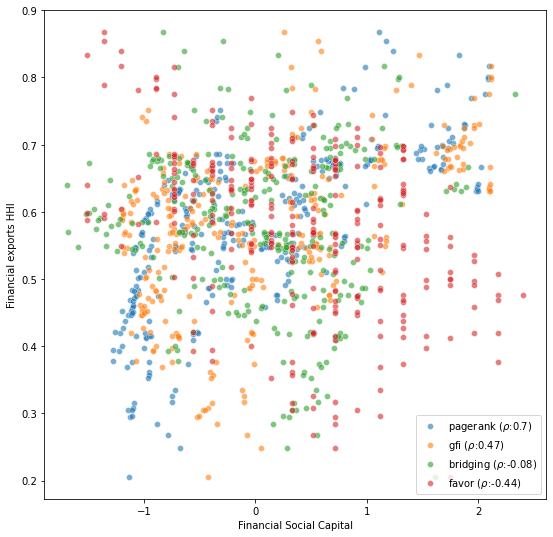

,centrality,financial pearson,financial p-value pearsonr,financial spearman,financial p-value spearman
0,pagerank,0.695231,1.223591e-44,0.731325,1.871915e-51
1,gfi,0.465049,1.669788e-17,0.444461,5.882732e-16
2,bridging,-0.082533,1.538736e-01,-0.073163,2.063647e-01
3,favor,-0.438423,1.598712e-15,-0.423227,1.815923e-14


In [4]:
fig, ax = plt.subplots(figsize=(9,9))

for c in centralities:
    sns.scatterplot(df['financial_'+c], 
                y = df['financial_hhi'], 
                ax=ax, 
                label = c, 
                alpha = 0.6)
    
plt.xlabel('Financial Social Capital')
plt.ylabel('Financial exports HHI')

plt.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i, l in enumerate(L_labels):
    centrality = l.get_text()
    corr = pearsonr(df['financial_hhi'], df['financial_' + centrality])[0]
    text = centrality + f' ($\\rho$:{round(corr,2)})'
    L_labels[i].set_text(text)

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'financial_social_capital_vs_diversification.png')
plt.savefig(save_to)     
plt.show()

df_correlations = pd.DataFrame({'centrality':centralities})

df_correlations['financial pearson'], df_correlations['financial p-value pearsonr'] = zip(*df_correlations.centrality.map(lambda x: pearsonr(df['financial_hhi'], df['financial_'+x])))
df_correlations['financial spearman'], df_correlations['financial p-value spearman'] = zip(*df_correlations.centrality.map(lambda x: spearmanr(df['financial_hhi'], df['financial_'+x])))

df_correlations

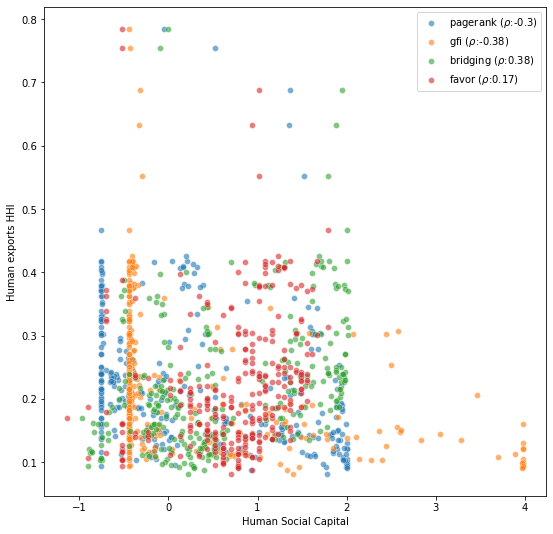

,centrality,human pearson,human p-value pearsonr,human spearman,human p-value spearman
0,pagerank,-0.301827,9.777593e-08,-0.419395,3.287956e-14
1,gfi,-0.379593,1.020073e-11,-0.450981,1.954175e-16
2,bridging,0.376793,1.484742e-11,0.415097,6.342860e-14
3,favor,0.172058,2.789573e-03,0.345011,8.232347e-10


In [5]:
fig, ax = plt.subplots(figsize=(9,9))

for c in centralities:
    sns.scatterplot(df['human_'+c], y = df['human_hhi'], ax=ax, label = c, 
                alpha = 0.6)
    
plt.xlabel('Human Social Capital')
plt.ylabel('Human exports HHI')

plt.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i, l in enumerate(L_labels):
    centrality = l.get_text()
    corr = pearsonr(df['human_hhi'], df['human_' + centrality])[0]
    text = centrality + f' ($\\rho$:{round(corr,2)})'
    L_labels[i].set_text(text)

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'human_social_capital_vs_diversification.png')
plt.savefig(save_to)        
plt.show()

df_correlations = pd.DataFrame({'centrality':centralities})

df_correlations['human pearson'], df_correlations['human p-value pearsonr'] = zip(*df_correlations.centrality.map(lambda x: pearsonr(df['human_hhi'], df['human_'+x])))
df_correlations['human spearman'], df_correlations['human p-value spearman'] = zip(*df_correlations.centrality.map(lambda x: spearmanr(df['human_hhi'], df['human_'+x])))

df_correlations

In [22]:
df.groupby(by='country').year.nunique()

country
AUS     2
AUT     9
BEL    11
BGR    10
BRA     4
CAN    11
CHE    10
CHL     4
CHN     1
CRI     6
CZE    11
DEU     6
DNK     5
ESP     9
EST     3
FIN    11
FRA     4
GBR    11
GRC    11
HUN    10
IND     1
IRL    11
ISL    11
ISR     5
ITA    11
JPN     3
KOR     1
LTU    11
LUX     1
LVA    11
MEX     2
NLD     5
NOR     8
NZL     3
POL    11
PRT    11
ROU    10
RUS     1
SVK    11
SVN    11
SWE     3
TUR     5
USA     3
ZAF     1
Name: year, dtype: int64